In [55]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Balancing Data
from imblearn.over_sampling import SMOTE

# Hyperparameter Tuning
import optuna

# Warnings
import warnings
warnings.filterwarnings('ignore')


# Learning About Data =>

In [38]:
# Load datasets
df_train = pd.read_csv('/content/Credit_Training_cleaned_completed.csv')
df_test = pd.read_csv('/content/Credit_Testing_Cleaned_Compeleted.csv')

# Quick check of shapes and sample
print(df_train.shape, df_test.shape)
display(df_train.head(), df_test.head())


(100000, 29) (49996, 28)


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Months,Num_of_Loan_capped,Avg_Credit_Limit_Change,Credit_Limit_Change_Volatility,Min_Credit_Limit_Change
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,265,4,10.395,1.807722,6.27
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,49.574949,118.280222,Low_spent_Large_value_payments,284.629163,Good,265,4,10.395,1.807722,6.27
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,267,4,10.395,1.807722,6.27
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,268,4,10.395,1.807722,6.27
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,Scientist,19114.12,1824.843333,3,4,...,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,269,4,10.395,1.807722,6.27


,ID,Customer_ID,Month,Name,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_History_Months,Avg_Credit_Limit_Change,Credit_Limit_Change_Volatility,Min_Credit_Limit_Change
0,0x160a,CUS_0xd40,September,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,...,32.430559,No,49.574949,21.465380,High_spent_Medium_value_payments,186.266702,274,12.02,0.829156,11.27
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,...,32.430559,No,49.574949,21.465380,High_spent_Medium_value_payments,186.266702,274,12.02,0.829156,11.27
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,...,32.430559,No,49.574949,21.465380,High_spent_Medium_value_payments,186.266702,274,12.02,0.829156,11.27
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24,Scientist,19114.12,1824.843333,3,4,...,32.430559,No,49.574949,21.465380,High_spent_Medium_value_payments,186.266702,274,12.02,0.829156,11.27
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,Teacher,34847.84,3037.986667,2,4,...,25.926822,No,18.816215,39.684018,High_spent_Large_value_payments,303.355083,327,5.92,0.866025,5.42


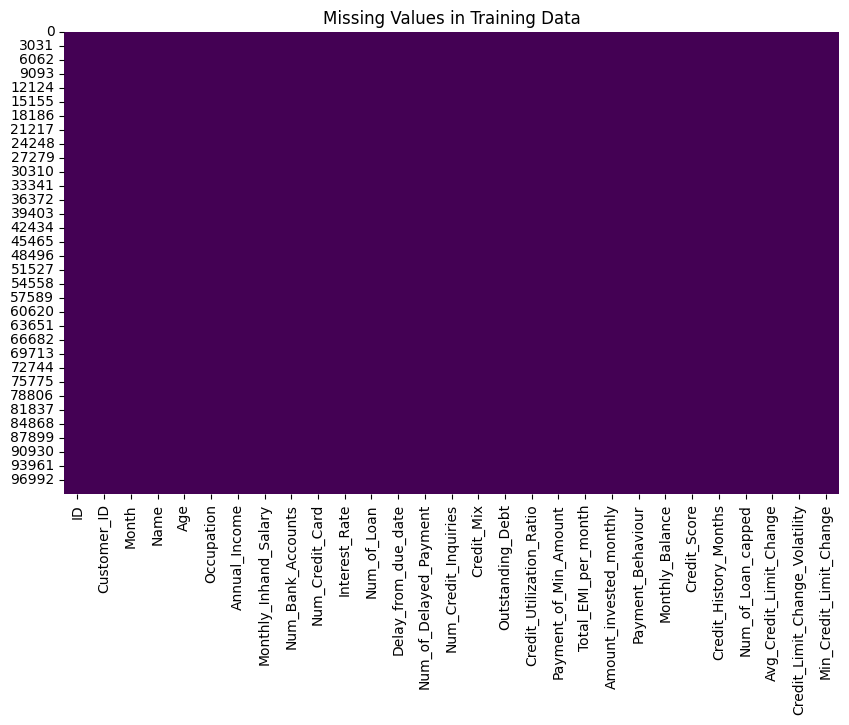

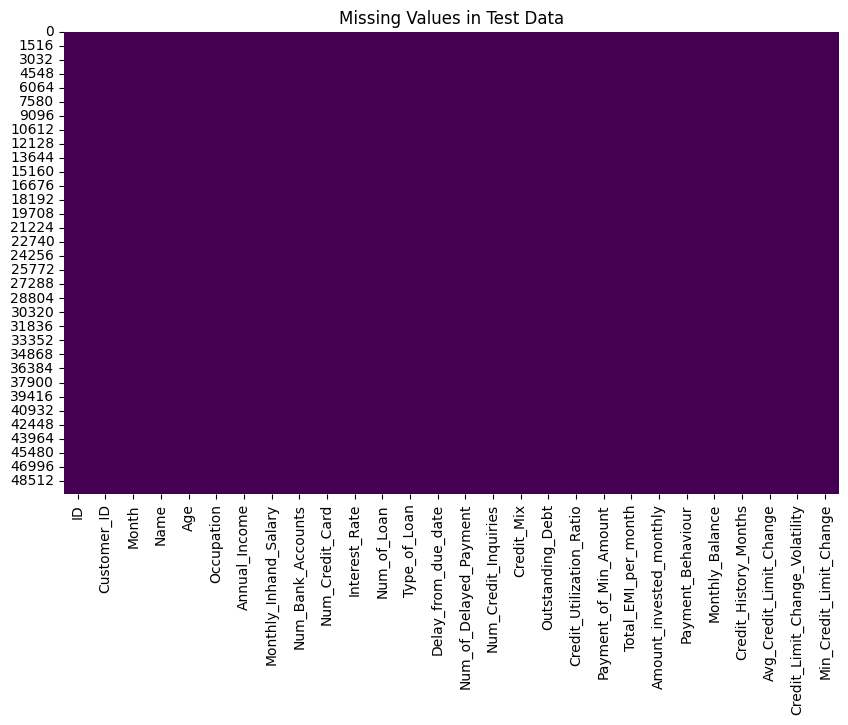

0 missing values in training data
0 missing values in test data


In [39]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Training Data')
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Data')
plt.show()

# Confirm no missing values
print(df_train.isnull().sum().sum(), "missing values in training data")
print(df_test.isnull().sum().sum(), "missing values in test data")


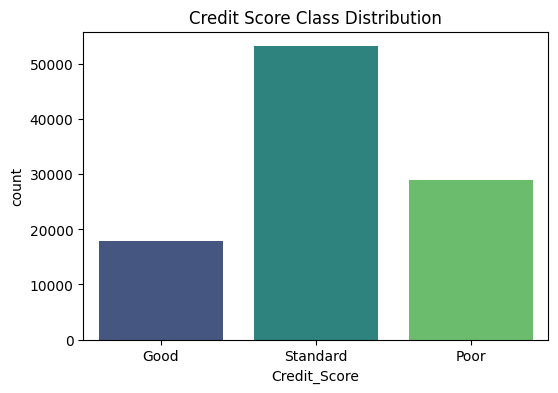

In [23]:
#visualize the data
plt.figure(figsize=(6,4))
sns.countplot(x='Credit_Score', data=df_train, palette='viridis')
plt.title('Credit Score Class Distribution')
plt.show()


In [24]:
print(df_train.columns)
print(df_test.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Months', 'Num_of_Loan_capped',
       'Avg_Credit_Limit_Change', 'Credit_Limit_Change_Volatility',
       'Min_Credit_Limit_Change'],
      dtype='object')
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'C

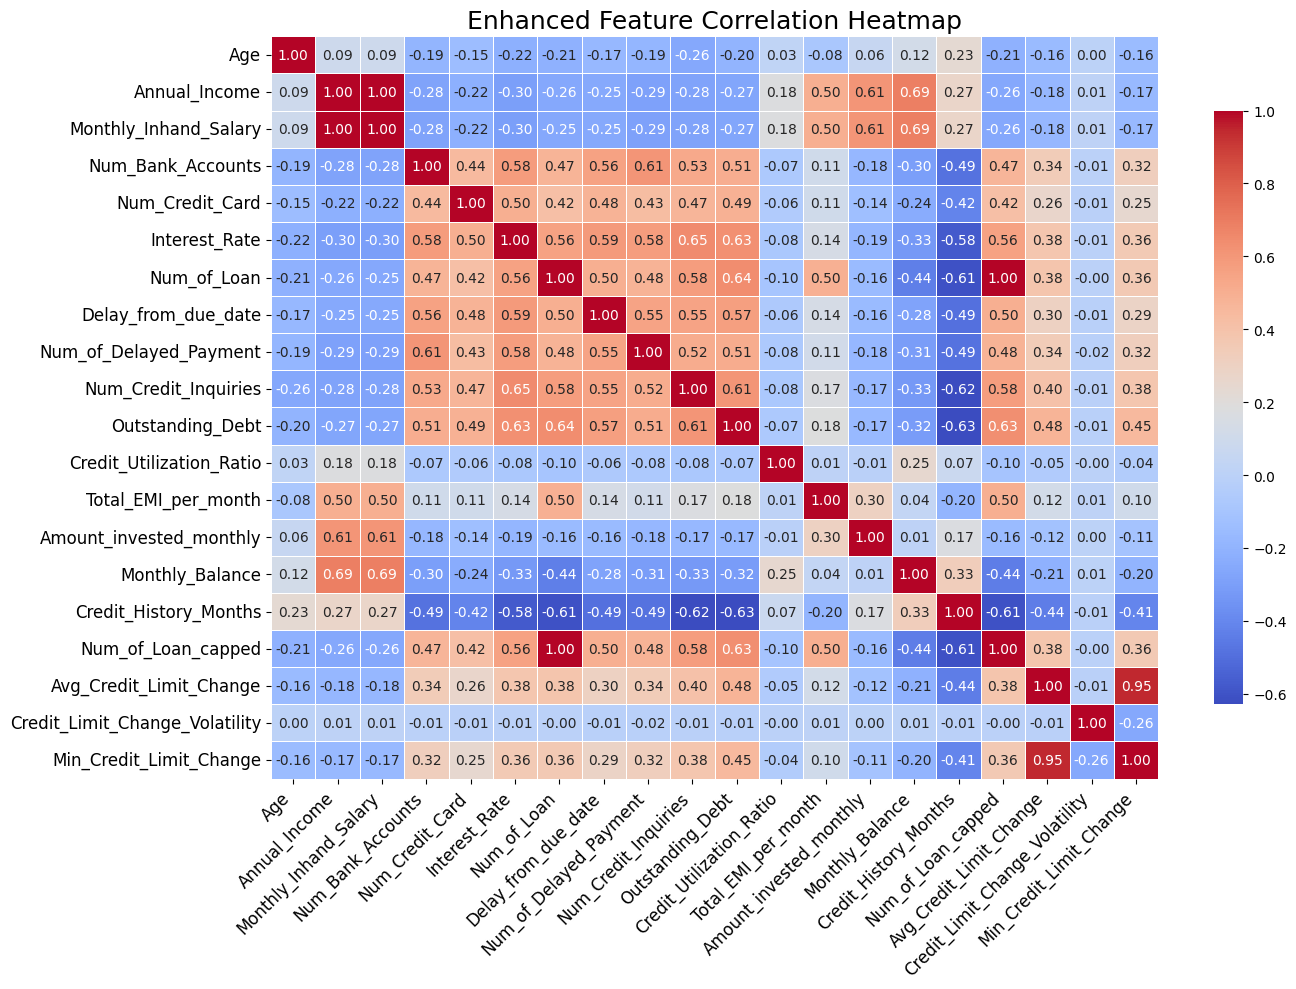

In [41]:
plt.figure(figsize=(14,10))
correlation = df_train.corr(numeric_only=True)
sns.heatmap(correlation, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Enhanced Feature Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [26]:
print(df_train.columns)
print(df_test.columns)


Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Credit_History_Months', 'Num_of_Loan_capped',
       'Avg_Credit_Limit_Change', 'Credit_Limit_Change_Volatility',
       'Min_Credit_Limit_Change'],
      dtype='object')
Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'C

# Data Pre-Processing

In [42]:
# Drop unnecessary columns
df_train.drop(columns=['ID', 'Customer_ID', 'Name'], inplace=True)
df_test.drop(columns=['ID', 'Customer_ID', 'Name'], inplace=True)
print("Drop columns successfully")

# Label encode target variable
le = LabelEncoder()
df_train['Credit_Score'] = le.fit_transform(df_train['Credit_Score'])

# One-hot encode categorical features
df_train = pd.get_dummies(df_train, drop_first=True)
df_test = pd.get_dummies(df_test, drop_first=True)

# Align columns in train and test data
df_test = df_test.reindex(columns=df_train.columns.drop('Credit_Score'), fill_value=0)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Monthly_Balance', 'Outstanding_Debt']
df_train[numerical_cols] = scaler.fit_transform(df_train[numerical_cols])
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])
print("Encoding and scaling complete")


Drop columns successfully
Encoding and scaling complete


Class distribution after SMOTE: Counter({0: 53174, 2: 53174, 1: 53174})


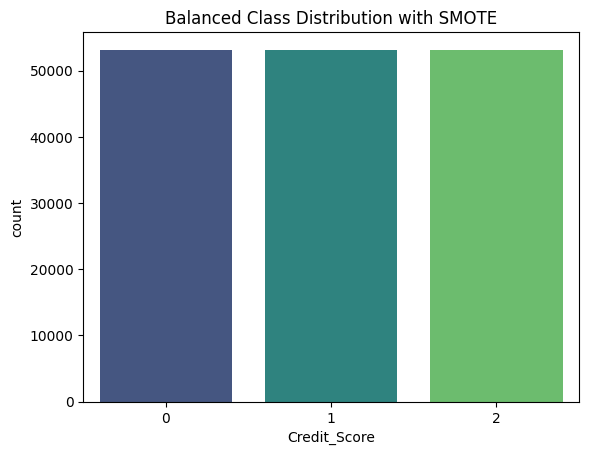

In [43]:
X = df_train.drop('Credit_Score', axis=1)
y = df_train['Credit_Score']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Confirm class balance
from collections import Counter
print("Class distribution after SMOTE:", Counter(y_resampled))

# Visualize class balance
sns.countplot(x=y_resampled, palette='viridis')
plt.title('Balanced Class Distribution with SMOTE')
plt.show()




# Training Phase is Here 🔥🔥🔥

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
print("Train-test split complete")

# splitting the already seprated data into x,y x,y you got it....

Train-test split complete


Randow 😵 Forest !! 🌴


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     10635
           1       0.79      0.80      0.79     10635
           2       0.80      0.63      0.70     10635

    accuracy                           0.77     31905
   macro avg       0.77      0.77      0.77     31905
weighted avg       0.77      0.77      0.77     31905

Random Forest Validation Accuracy: 0.7701


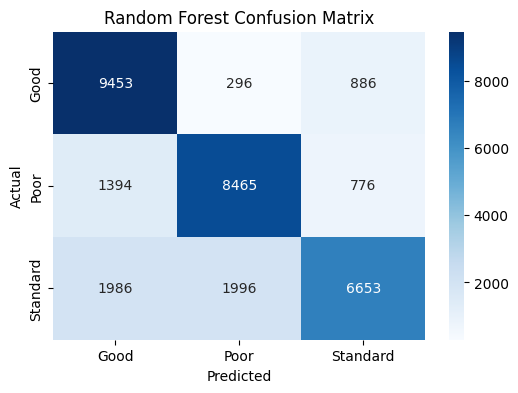

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Simplified Random Forest model
rf_simple = RandomForestClassifier(
    n_estimators=100,         # Balanced number of trees
    max_depth=12,             # Reasonable depth
    min_samples_split=5,      # Avoid overfitting
    min_samples_leaf=3,       # Balanced leaves
    class_weight='balanced',  # Handle class imbalance
    random_state=42
)

# Train on training data
rf_simple.fit(X_train, y_train)

# Predictions on validation data
y_pred_rf = rf_simple.predict(X_val)

# Evaluation metrics
print("\nRandom Forest Classification Report:\n", classification_report(y_val, y_pred_rf))
print(f"Random Forest Validation Accuracy: {accuracy_score(y_val, y_pred_rf):.4f}")

# Confusion matrix visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


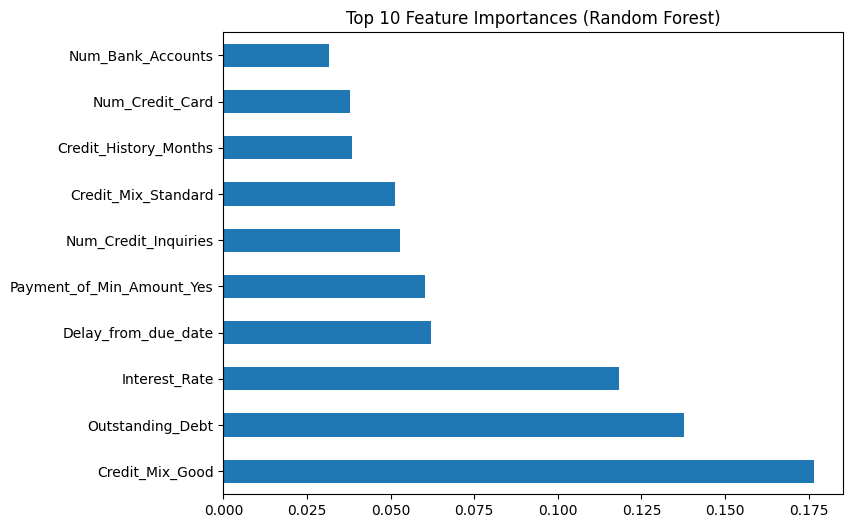

In [59]:
plt.figure(figsize=(8,6))
feature_importance_rf = pd.Series(rf_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importance_rf[:10].plot(kind='barh')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()


Xgboost(with hyper tuning)!! 🔥🔥🔥🔥


In [60]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'subsample': trial.suggest_float('subsample', 0.5, 0.8),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 0.8),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 5, 15),
        'reg_lambda': trial.suggest_float('reg_lambda', 5, 15),
        'random_state': 42
    }

    model = XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss')
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return np.mean(cv_scores)

# Optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_trial.params)
print("Best cross-validated accuracy:", study.best_trial.value)


[I 2025-03-13 08:35:25,385] A new study created in memory with name: no-name-350d08f8-3b00-499e-a0e6-007f1a568607
[I 2025-03-13 08:35:54,647] Trial 0 finished with value: 0.7690824936529341 and parameters: {'n_estimators': 119, 'max_depth': 5, 'learning_rate': 0.049984917275037975, 'subsample': 0.7679338804265174, 'colsample_bytree': 0.7645872255765954, 'min_child_weight': 3, 'gamma': 0.3929809529781081, 'reg_alpha': 13.17809017177276, 'reg_lambda': 8.268264746394914}. Best is trial 0 with value: 0.7690824936529341.
[I 2025-03-13 08:37:01,182] Trial 1 finished with value: 0.7714097669759139 and parameters: {'n_estimators': 296, 'max_depth': 5, 'learning_rate': 0.023553863707710523, 'subsample': 0.5701018207932468, 'colsample_bytree': 0.7170693054928698, 'min_child_weight': 3, 'gamma': 0.07488010751347085, 'reg_alpha': 7.694949763184296, 'reg_lambda': 14.036129039158903}. Best is trial 1 with value: 0.7714097669759139.
[I 2025-03-13 08:37:48,564] Trial 2 finished with value: 0.781533810

Best parameters: {'n_estimators': 277, 'max_depth': 6, 'learning_rate': 0.08890847872236829, 'subsample': 0.6922462168192935, 'colsample_bytree': 0.5784342466224255, 'min_child_weight': 8, 'gamma': 1.2695798408146806, 'reg_alpha': 6.573322709452626, 'reg_lambda': 7.142873157034064}
Best cross-validated accuracy: 0.8062405349850751



Final Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85     10635
           1       0.84      0.79      0.81     10635
           2       0.79      0.73      0.76     10635

    accuracy                           0.81     31905
   macro avg       0.81      0.81      0.81     31905
weighted avg       0.81      0.81      0.81     31905

Final Tuned XGBoost Accuracy: 0.8066


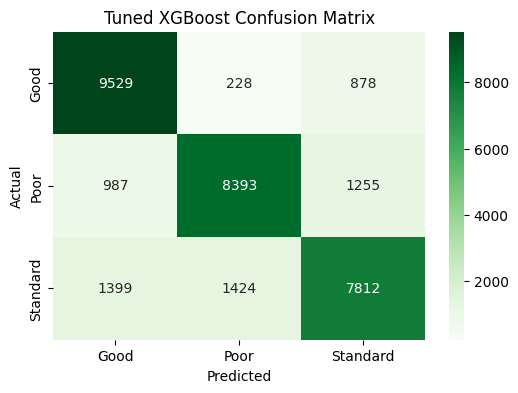

In [62]:
# Get the best parameters from Optuna
best_params = study.best_trial.params

# Train the final XGBoost model with best params
xgb_final = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='mlogloss')
xgb_final.fit(X_train, y_train)

# Make predictions on validation set
y_pred_xgb = xgb_final.predict(X_val)

# Final evaluation metrics
print("\nFinal Tuned XGBoost Classification Report:\n", classification_report(y_val, y_pred_xgb))
print(f"Final Tuned XGBoost Accuracy: {accuracy_score(y_val, y_pred_xgb):.4f}")

# Confusion matrix visualization
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [63]:
# Training accuracy
train_preds = xgb_final.predict(X_train)
train_acc = accuracy_score(y_train, train_preds)

# Validation accuracy
val_acc = accuracy_score(y_val, y_pred_xgb)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Validation Accuracy: {val_acc:.4f}")


Training Accuracy: 0.8235
Validation Accuracy: 0.8066


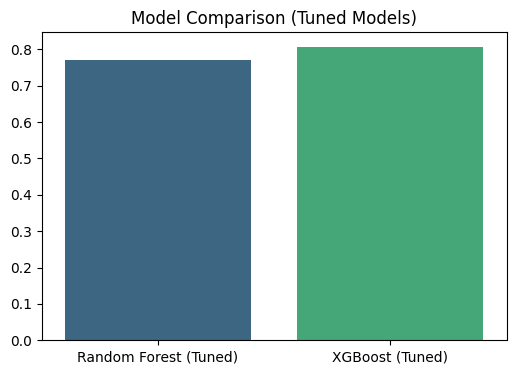

In [64]:
models = ['Random Forest (Tuned)', 'XGBoost (Tuned)']
accuracies = [accuracy_score(y_val, y_pred_rf), study.best_trial.value]

plt.figure(figsize=(6,4))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison (Tuned Models)')
plt.show()
